## Import Required Libraries

In [112]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
#import DataFrame
df=pd.read_csv(r"C:\Users\Monikesh Kakoty\Desktop\Data Science\spam1.csv", encoding='ISO-8859-1')

In [114]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [116]:
df.shape

(5572, 5)

In [117]:
df=df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1)


In [118]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df=df.rename(columns={"v1":"result","v2":"text"})
df

,result,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [120]:
df['result'].value_counts()

ham     4825
spam     747
Name: result, dtype: int64

In [121]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['result']=encoder.fit_transform(df['result'])

In [122]:
df.head()

,result,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df.duplicated().sum()

403

In [124]:
df=df.drop_duplicates(keep='first')

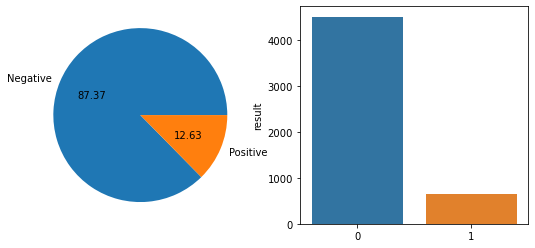

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['result'].value_counts(),labels=['Negative','Positive'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['result'].value_counts().index,y=df['result'].value_counts(),data=df)
plt.show()

### **Conclusion**
  - As seen Data is Imbalance here first we process with imbalace data

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   result  5169 non-null   int32 
 1   text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [127]:
df['num_char']=df['text'].apply(len)

In [128]:
df['num_words']=df['text'].apply(lambda x: len(str(x).split()))

In [129]:
df

,result,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,30
5568,0,Will Ì_ b going to esplanade fr home?,37,8
5569,0,"Pity, * was in mood for that. So...any other s...",57,10
5570,0,The guy did some bitching but I acted like i'd...,125,26


In [130]:
pip install spacy

In [131]:
conda install -c conda-forge spacy-model-en_core_web_sm


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: spacy-model-en_core_web_sm


In [132]:
import spacy

nlp = spacy.blank('en')

In [133]:
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [134]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Monikesh
[nltk_data]     Kakoty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:

df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [136]:
df.head()

,result,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [137]:
df.describe()


,result,num_char,num_words,num_sen
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,15.340685,1.947185
std,0.332253,58.236293,11.068488,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,7.000000,1.000000
50%,0.000000,60.000000,12.000000,1.000000
75%,0.000000,117.000000,22.000000,2.000000
max,1.000000,910.000000,171.000000,28.000000


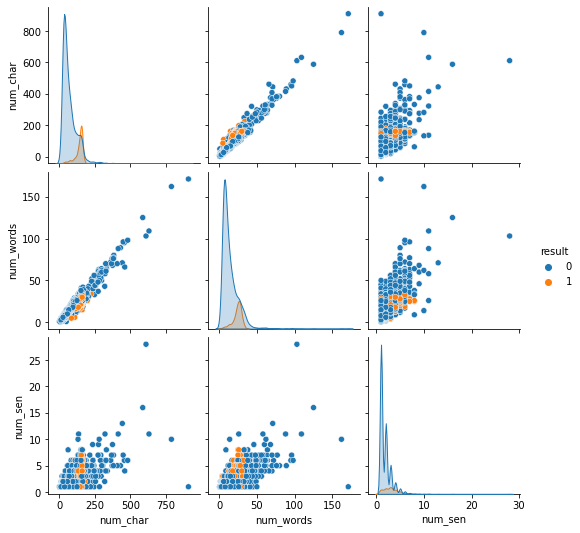

In [138]:
sns.pairplot(df,hue='result')
plt.show()

In [139]:
i=df[df['num_char']>500].index
df.drop(i,axis=0,inplace=True)

In [140]:
df=df.reset_index()
df.drop("index",inplace=True,axis=1)

In [141]:
df

,result,text,num_char,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1
...,...,...,...,...,...
5159,1,This is the 2nd time we have tried 2 contact u...,161,30,4
5160,0,Will Ì_ b going to esplanade fr home?,37,8,1
5161,0,"Pity, * was in mood for that. So...any other s...",57,10,2
5162,0,The guy did some bitching but I acted like i'd...,125,26,1


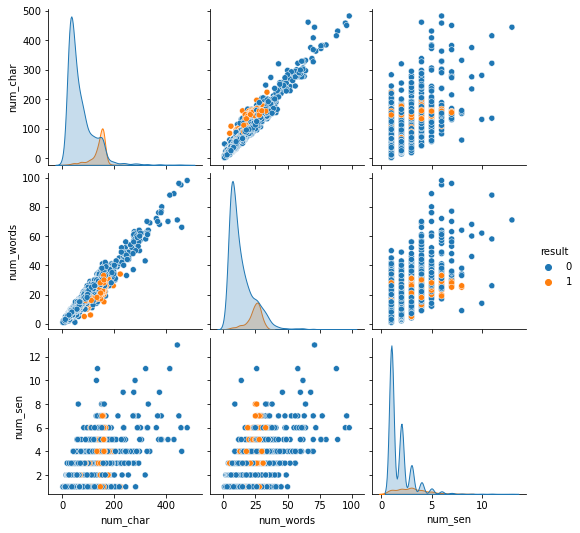

In [142]:
sns.pairplot(df,hue='result')
plt.show()

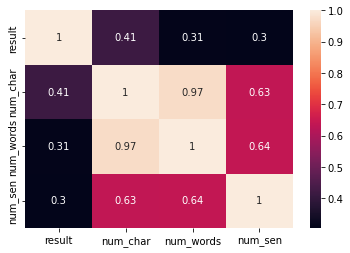

In [143]:
sns.heatmap(df.corr(),annot=True)
plt.show()

##### **Create Common function to Clean or process Text Data**
**Lower casing** to avoids duplicates
**Tokenization** sentences
Remove **Specials characters**
Remove **Stopwords**
Remove **punctuation**

In [144]:
from spacy.lang.en.stop_words import STOP_WORDS
import string
def transform_text(text):
    text = text.lower()
    text = [word.text for word in nlp(text)]
    y=[]
    for i in text:
        if i.isalnum() and (i not in STOP_WORDS) and (i not in string.punctuation):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        for j in nlp(i):
            y.append(j.lemma_)
    return " ".join(y)

In [145]:
#call function
df['transformed_text']=df['text'].apply(transform_text)

In [146]:
df.head()

,result,text,num_char,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,
1,0,Ok lar... Joking wif u oni...,29,6,2,
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,
3,0,U dun say so early hor... U c already then say...,49,11,1,
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,


In [147]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in df[df['result']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [148]:
print(spam_corpus)

[]


In [149]:
from nltk.corpus import stopwords
stopwords.words('english')
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [150]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Monikesh
[nltk_data]     Kakoty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [151]:
def transform_text(text):
    #1.lower casing
    text=text.lower()
    
    #2.tokenization
    lst=nltk.word_tokenize(text)
    
    #3.remove spcl characters stopwords and punctuation
    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)
            
    #4.stemming        
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()   

In [152]:
df['text'] = df['text'].apply(transform_text)
df['num_words_transform']=df['text'].apply(lambda x: len(str(x).split()))


In [153]:
df

,result,text,num_char,num_words,num_sen,transformed_text,num_words_transform
0,0,go jurong point crazi avail bugi n great world...,111,20,2,,16
1,0,ok lar joke wif u oni,29,6,2,,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2,,24
3,0,u dun say earli hor u c alreadi say,49,11,1,,9
4,0,nah think goe usf live around though,61,13,1,,7
...,...,...,...,...,...,...,...
5159,1,2nd time tri 2 contact u pound prize 2 claim e...,161,30,4,,17
5160,0,b go esplanad fr home,37,8,1,,5
5161,0,piti mood suggest,57,10,2,,3
5162,0,guy bitch act like interest buy someth els nex...,125,26,1,,13


### Most common words used for Spam Text

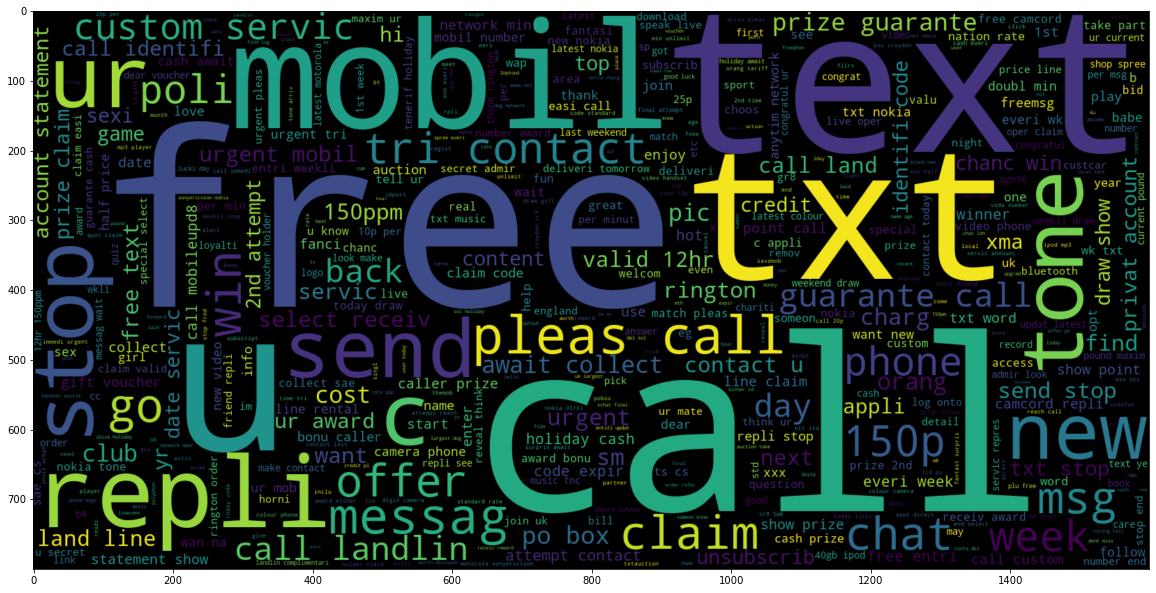

In [154]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
wc = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(df[df.result == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

### Most common words used for Not spam Text or Ham 

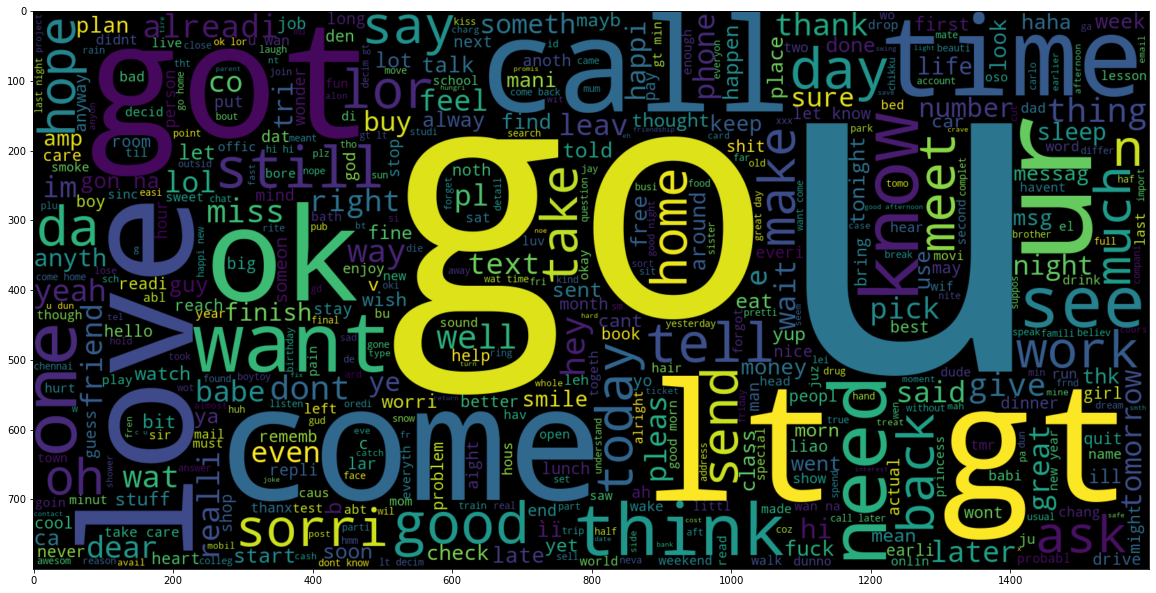

In [155]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(width = 1600 , height = 800 , max_words = 500).generate(" ".join(df[df.result == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

### Compare Total No of charactres & words in spam and non spam text  

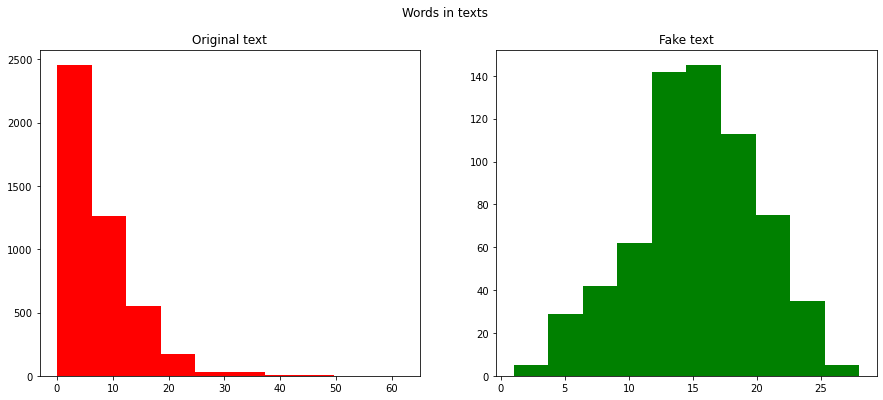

In [156]:
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['result']==0]['num_words_transform']
ax1.hist(text_len,color='red')
ax1.set_title('Original text')
text_len=df[df['result']==1]['num_words_transform']
ax2.hist(text_len,color='green')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

Text(0.5, 0.98, 'Average word length in each text')

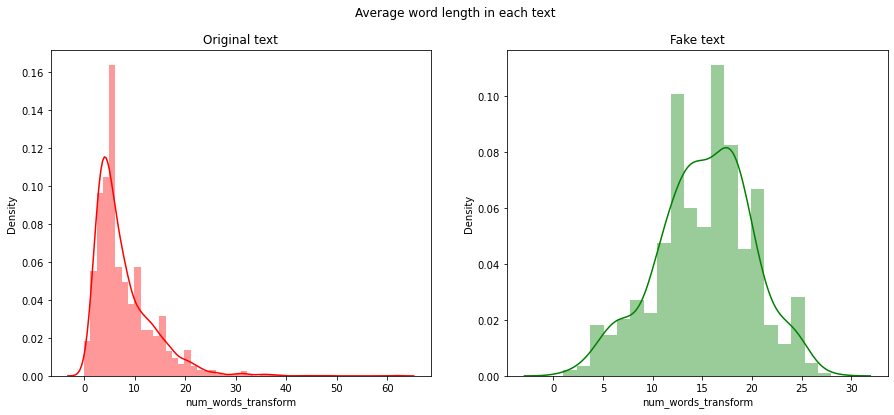

In [157]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
word=df[df['result']==0]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Original text')
word=df[df['result']==1]['num_words_transform']
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text')
fig.suptitle('Average word length in each text')

### **Conclusion**
  - After visualize we can conclude that spam text has more words and characters as compare to Ham text
  - Average characters includes in **spam SMS** is around **90 characters**
  - Average words includes in **spam SMS** is around **15 words**

## Model Building

In [158]:
### Text Vecorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [159]:
#Input and Output Features
X = tfidf.fit_transform(df['text']).toarray()
y = df['result'].values

In [160]:
X.shape

(5164, 3000)

In [161]:
y.shape

(5164,)

### Train Test Split

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### Imports Libraries

In [164]:
#Model Training
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [166]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred1))
print("Precision Score -",precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Accuracy Score - 0.8557599225556631
Precision Score - 0.4625
[[773 129]
 [ 20 111]]


In [167]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9738625363020329
Precision Score - 1.0
[[902   0]
 [ 27 104]]


In [168]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

In [169]:
#Common Function for model train
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [170]:
svc=SVC(kernel='sigmoid', gamma=1.0)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9690222652468539, 0.9626168224299065, 0.9852335996126845)

In [171]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()

For  svc
Accuracy -  0.9690222652468539
Precision -  0.9626168224299065

For  knc
Accuracy -  0.9070667957405615
Precision -  1.0

For  mnb
Accuracy -  0.9738625363020329
Precision -  1.0

For  dtc
Accuracy -  0.9293320425943853
Precision -  0.7959183673469388

For  lr
Accuracy -  0.9438528557599225
Precision -  0.9010989010989011

For  rfc
Accuracy -  0.9699903194578896
Precision -  0.9716981132075472

For  adb
Accuracy -  0.957405614714424
Precision -  0.9142857142857143

For  xgb
Accuracy -  0.9583736689254598
Precision -  0.9313725490196079

For  gbc
Accuracy -  0.9506292352371732
Precision -  0.9444444444444444



In [172]:
df1=pd.DataFrame({'Algorithm':classifiers.keys(),'Precision':precision_scores,
                  'Test Accuracy':accuracy_scores,'Train Accuracy':train_accuracy_score}).round(3)

In [173]:
df2=df1.sort_values(['Precision','Test Accuracy'],ascending=False)
df2

,Algorithm,Precision,Test Accuracy,Train Accuracy
2,mnb,1.000,0.974,0.980
1,knc,1.000,0.907,0.927
5,rfc,0.972,0.970,1.000
0,svc,0.963,0.969,0.985
8,gbc,0.944,0.951,0.969
7,xgb,0.931,0.958,0.985
6,adb,0.914,0.957,0.976
4,lr,0.901,0.944,0.965
3,dtc,0.796,0.929,0.953


In [174]:
df3 = pd.melt(df2, id_vars = "Algorithm")

In [175]:
df3.head()

,Algorithm,variable,value
0,mnb,Precision,1.000
1,knc,Precision,1.000
2,rfc,Precision,0.972
3,svc,Precision,0.963
4,gbc,Precision,0.944


In [176]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [177]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [178]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [179]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738625363020329
Precision 0.9727272727272728


In [180]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9738625363020329
Precision Score - 1.0
[[902   0]
 [ 27 104]]


In [181]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))